In [5]:
    !pip3 install tensorflow
    !pip3 install opencv-python


In [10]:
import tensorflow as  tf
from tensorflow.keras.models import Sequential, Model, model_from_json, load_model
from tensorflow.keras.layers import *
from tensorflow.keras import optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import string
import tensorflow.keras as keras
import numpy as numpy
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import load_img, img_to_array






In [11]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [12]:
import IPython
print(IPython.sys_info())


{'commit_hash': '223e783c4',
 'commit_source': 'installation',
 'default_encoding': 'utf-8',
 'ipython_path': '/Users/aadithyanair/opt/anaconda3/lib/python3.8/site-packages/IPython',
 'ipython_version': '7.19.0',
 'os_name': 'posix',
 'platform': 'macOS-10.15.5-x86_64-i386-64bit',
 'sys_executable': '/Users/aadithyanair/opt/anaconda3/bin/python',
 'sys_platform': 'darwin',
 'sys_version': '3.8.5 (default, Sep  4 2020, 02:22:02) \n[Clang 10.0.0 ]'}


In [13]:
TRAIN_RATIO = 0.6
VALIDATION_RATIO = 0.2
TEST_RATIO = 0.2
mnist = tf.keras.datasets.mnist

# train is now 60% of the entire data set
(x_train, y_train), (x_test, y_test) = mnist.load_data()

X = numpy.concatenate([x_train, x_test])
y = numpy.concatenate([y_train, y_test])

x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=(1-TRAIN_RATIO))
x_val, x_test, y_val, y_test = train_test_split(x_val, y_val, test_size=((TEST_RATIO/(VALIDATION_RATIO+TEST_RATIO))))
#Normalize the data
x_train = tf.keras.utils.normalize(x_train, axis = -1)
x_test = tf.keras.utils.normalize(x_test, axis = -1)
x_val = tf.keras.utils.normalize(x_val, axis = -1)


# Plotting some of the data

First 16 images:

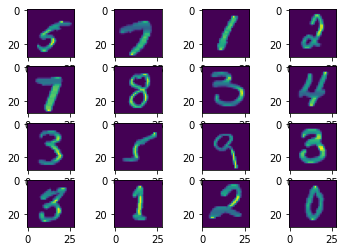

In [233]:
fig, axs = plt.subplots(4, 4)
count = 0
for i in range(4):
    for j in range(4):
        axs[i,j].imshow(x_train[count])
        count += 1

# Basic ANN Model

In [234]:
baseModel = Sequential()
baseModel.add(Flatten(input_shape=(28,28)))
baseModel.add(Dense(units = 128, activation = 'relu'))
baseModel.add(Dense(units = 128, activation = 'relu'))
baseModel.add(Dense(units = 20, activation = 'softmax'))
baseModel.summary()

baseModel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
baseModel.fit(x_train, y_train, validation_data = (x_val, y_val), epochs=10, batch_size=100)


Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_21 (Flatten)        (None, 784)               0         
                                                                 
 dense_72 (Dense)            (None, 128)               100480    
                                                                 
 dense_73 (Dense)            (None, 128)               16512     
                                                                 
 dense_74 (Dense)            (None, 20)                2580      
                                                                 
Total params: 119,572
Trainable params: 119,572
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
420/420 [==============================] - 3s 4ms/step - loss: 0.4559 - accuracy: 0.8708 - val_loss: 0.2067 - val_accuracy: 0.9364
Epoch 2/10
420/420 [=================

In [235]:
loss, accuracy = baseModel.evaluate(x_test, y_test)
print("Loss : ", loss)
print("Accuracy : ", accuracy)

438/438 [==============================] - 1s 1ms/step - loss: 0.0897 - accuracy: 0.9743
Loss :  0.08973636478185654
Accuracy :  0.9742857217788696


219/219 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1368
           1       0.98      0.99      0.99      1560
           2       0.98      0.98      0.98      1404
           3       0.96      0.98      0.97      1440
           4       0.97      0.98      0.97      1396
           5       0.97      0.96      0.97      1260
           6       0.98      0.98      0.98      1351
           7       0.97      0.98      0.98      1433
           8       0.96      0.96      0.96      1340
           9       0.98      0.95      0.96      1448

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000

438/438 [==============================] - 0s 995us/step
Prediction:  0


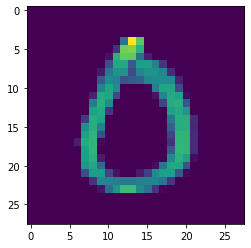

In [236]:

y_pred = baseModel.predict(x_test, batch_size=64, verbose=1)
y_pred_bool = numpy.argmax(y_pred, axis=1)



print(classification_report(y_test, y_pred_bool))


prediction = baseModel.predict([x_test])
print('Prediction: ', numpy.argmax(prediction[20]))
plt.imshow(x_test[20])
plt.show()


In [237]:
baseModel_json = baseModel.to_json()
with open("baseModel.json", "w") as json_file:
    json_file.write(baseModel_json)
baseModel.save_weights("model.h5")

baseModeljsonfile = open('baseModel.json', 'r')
loaded_baseModel_json = baseModeljsonfile.read()
baseModeljsonfile.close()
baseModelNew = model_from_json(loaded_baseModel_json)
baseModelNew.load_weights("model.h5")

baseModelNew.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
loss, accuracy = baseModelNew.evaluate(x_test, y_test)

print("Loss : ", loss)
print("Accuracy : ", accuracy)


438/438 [==============================] - 1s 2ms/step - loss: 0.0897 - accuracy: 0.9743
Loss :  0.08973636478185654
Accuracy :  0.9742857217788696


In [238]:
def load_image(filename):
    img = load_img(filename, grayscale = True, target_size=(28,28))
    img = img_to_array(img)
    img = img.reshape(1, 28, 28, 1)

    img = img.astype('float32')
    img = img/255.0
    return img


In [242]:
file = input("What is the file name")
img = load_image(file)
predict_value = baseModelNew.predict(img)
digit = argmax(predict_value)
print(digit)


What is the file name sample_image1.png


1/1 [==============================] - 0s 20ms/step
2


In [243]:
loss1 = str(loss)
accuracy1 = str(accuracy)
digit1 = str(digit)

In [244]:
with open('resultsANN.txt', 'w') as f:
    f.write("This is the loss \n")
    f.writelines(loss1)
    f.write("\n")
    f.write("This is the accuracy \n")
    f.writelines(accuracy1)
    f.write("\n")
    f.write("Based on the file inputted, the ANN Model predicts that the value is :")
    f.write("\n")
    f.writelines(digit1)
    f.close()

# Bi-Directional LSTM Implementation


In [245]:
from tensorflow.keras.layers import Bidirectional


In [246]:
bmodel = Sequential([
    Bidirectional(LSTM(256, input_shape=(28,28), return_sequences=True, activation='relu')),
    Bidirectional(LSTM(256, activation='relu')),
    Dense(10, activation='softmax')  
    ])
bmodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
early = EarlyStopping(patience=5)
bmodel.fit(x_train, y_train, validation_data = (x_val, y_val), verbose=1, batch_size=64, epochs=5, callbacks=early)
bmodel.evaluate(x_test, y_test)

Epoch 1/5


KeyboardInterrupt: 

438/438 [==============================] - 26s 59ms/step - loss: 0.0723 - accuracy: 0.9758
loss:  0.07227317988872528
accuracy:  0.9757857322692871
219/219 [==============================] - 19s 82ms/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1416
           1       0.99      0.99      0.99      1556
           2       0.98      0.98      0.98      1379
           3       0.97      0.99      0.98      1421
           4       0.94      0.99      0.96      1362
           5       0.99      0.97      0.98      1264
           6       0.99      0.95      0.97      1366
           7       0.99      0.97      0.98      1499
           8       0.99      0.95      0.97      1324
           9       0.93      0.98      0.96      1413

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000

438/438 [===========================

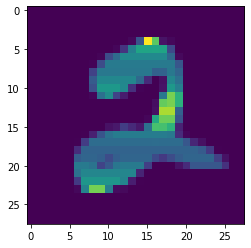

In [170]:
loss, accuracy = bmodel.evaluate(x_test, y_test)
print("loss: ", loss)
print("accuracy: ", accuracy)

y_pred = bmodel.predict(x_test, batch_size=64, verbose=1)
y_pred_bool = numpy.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

prediction = bmodel.predict([x_test])
print('Prediction: ', numpy.argmax(prediction[13]))
plt.imshow(x_test[13])
plt.show()

In [191]:
bdLSTMModel_json = bmodel.to_json()
with open("bdLSTMModel.json", "w") as json_file:
    json_file.write(bdLSTMModel_json)
bmodel.save_weights("bdModel.h5")

bdLSTMModeljsonfile = open('bdLSTMModel.json', 'r')
loaded_bdLSTMModel_json = bdLSTMModeljsonfile.read()
bdLSTMModeljsonfile.close()
bdLSTMModelNew = model_from_json(loaded_bdLSTMModel_json)
bdLSTMModelNew.load_weights("bdModel.h5")

bdLSTMModelNew.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
loss, accuracy = bdLSTMModelNew.evaluate(x_test, y_test)

loss1 = str(loss)
accuracy1 = str(accuracy)
file = input("What is the file name")
img = load_image(file)
predict_value = bdLSTMModelNew.predict(img)
digit = argmax(predict_value)
print(digit)
digit1 = str(digit)
with open('resultsBiDirectionalLSTM.txt', 'w') as f:
    f.write("This is the loss \n")
    f.writelines(loss1)
    f.write("\n")
    f.write("This is the accuracy \n")
    f.writelines(accuracy1)
    f.write("\n")
    f.write("Based on the file inputted, the Bi Directional LSTM Model predicts that the value is :")
    f.write("\n")
    f.writelines(digit1)
    f.close()

438/438 [==============================] - 23s 51ms/step - loss: 0.0723 - accuracy: 0.9758


UsageError: Line magic function `%%writefile` not found.


# RNN-LSTM Implementation

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 28, 256)           291840    
                                                                 
 lstm_5 (LSTM)               (None, 256)               525312    
                                                                 
 dense_6 (Dense)             (None, 64)                16448     
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 834,250
Trainable params: 834,250
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
329/329 [=============================

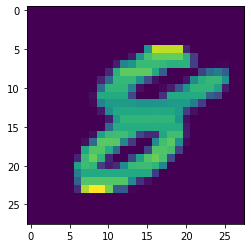

In [40]:
es_callback = EarlyStopping(patience = 2)

model = Sequential()
#CuDNNLSTM

model.add(LSTM(256, input_shape=(x_train.shape[1:]),  return_sequences=True, activation='relu'))
model.add(LSTM(256))
model.add(Dense(64, activation='softmax'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='relu'))
model.summary()
          

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_val, y_val), verbose = 1, batch_size=128, epochs=2, callbacks=[es_callback])
results = model.evaluate(x_test, y_test)
print("test loss, test acc:", results)

model.summary()
loss, accuracy = model.evaluate(x_test, y_test)
print("Loss : " , loss)
print("Accuracy : " , accuracy)

y_pred = model.predict(x_test, batch_size=64, verbose=1)
y_pred_bool = numpy.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

prediction = model.predict([x_test])
print('Prediction: ', numpy.argmax(prediction[10]))
plt.imshow(x_test[10])
plt.show()


In [ ]:
rnnModel_json = model.to_json()
with open("rnnModel.json", "w") as json_file:
    json_file.write(rnnModel_json)
model.save_weights("rnnModel.h5")

rnnModeljsonfile = open('rnnModel.json', 'r')
loaded_rnnModel_json = rnnModeljsonfile.read()
rnnModeljsonfile.close()
rnnModelNew = model_from_json(loaded_rnnModel_json)
rnnModelNew.load_weights("rnnModel.h5")

rnnModelNew.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
loss, accuracy = rnnModelNew.evaluate(x_test, y_test)
def load_image(filename):
    img = load_img(filename, grayscale = True, target_size=(28,28))
    img = img_to_array(img)
    img = img.reshape(1, 28, 28, 1)

    img = img.astype('float32')
    img = img/255.0
    return img
file = input("What is the file name")
img = load_image(file)
predict_value = rnn3ModelNew.predict(img)
digit = numpy.argmax(predict_value)
print(digit)
loss1 = str(loss)
accuracy1 = str(accuracy)
digit1 = str(digit)
with open('resultsRNN.txt', 'w') as f:
    f.write("This is the loss \n")
    f.writelines(loss1)
    f.write("\n")
    f.write("This is the accuracy \n")
    f.writelines(accuracy1)
    f.write("\n")
    f.write("Based on the file inputted, this RNN Model predicts that the value is :")
    f.write("\n")
    f.writelines(digit1)
    f.close()

438/438 [==============================] - 10s 22ms/step - loss: 1.8560 - accuracy: 0.3691


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 28, 128)           80384     
                                                                 
 lstm_3 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 213,258
Trainable params: 213,258
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
329/329 [==============================] - 33s 93ms/step - loss: 2.3610 - accuracy: 0.4271 - val_loss: 2.2986 - val_accuracy: 0.0992
Epoch 2/5
329/329 [==================

/Users/aadithyanair/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


438/438 [==============================] - 5s 11ms/step
Prediction:  0


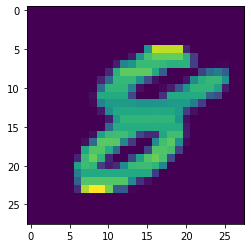

In [38]:
es_callback = EarlyStopping(patience = 3)
model4 = Sequential()
model4.add(LSTM(128,input_shape=(x_train.shape[1:]),  return_sequences=True, activation='relu') )
model4.add(LSTM(128))
model4.add(Dropout(0.2))
model4.add(Dense(10, activation='relu'))
model4.summary()


          

model4.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model4.fit(x_train, y_train, validation_data=(x_val, y_val), verbose = 1, batch_size=128, epochs=5, callbacks=[es_callback])
results = model4.evaluate(x_test, y_test)
print("test loss, test acc:", results)

model4.summary()
loss, accuracy = model4.evaluate(x_test, y_test)
print("Loss : " , loss)
print("Accuracy : " , accuracy)

y_pred = model4.predict(x_test, batch_size=64, verbose=1)
y_pred_bool = numpy.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

prediction = model4.predict([x_test])
print('Prediction: ', numpy.argmax(prediction[10]))
plt.imshow(x_test[10])
plt.show()

In [39]:
rnn4Model_json = model4.to_json()
with open("rnn4Model.json", "w") as json_file:
    json_file.write(rnn4Model_json)
model4.save_weights("rnn4Model.h5")

rnn4Modeljsonfile = open('rnn4Model.json', 'r')
loaded_rnn4Model_json = rnn4Modeljsonfile.read()
rnn4Modeljsonfile.close()
rnn4ModelNew = model_from_json(loaded_rnn4Model_json)
rnn4ModelNew.load_weights("rnn4Model.h5")

rnn4ModelNew.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
loss, accuracy = rnn4ModelNew.evaluate(x_test, y_test)
def load_image(filename):
    img = load_img(filename, grayscale = True, target_size=(28,28))
    img = img_to_array(img)
    img = img.reshape(1, 28, 28, 1)

    img = img.astype('float32')
    img = img/255.0
    return img
file = input("What is the file name")
img = load_image(file)
predict_value = rnn4ModelNew.predict(img)
digit = numpy.argmax(predict_value)
print(digit)
loss1 = str(loss)
accuracy1 = str(accuracy)
digit1 = str(digit)
with open('resultsRNN4.txt', 'w') as f:
    f.write("This is the loss \n")
    f.writelines(loss1)
    f.write("\n")
    f.write("This is the accuracy \n")
    f.writelines(accuracy1)
    f.write("\n")
    f.write("Based on the file inputted, this RNN Model predicts that the value is :")
    f.write("\n")
    f.writelines(digit1)
    f.close()

438/438 [==============================] - 6s 11ms/step - loss: 2.3026 - accuracy: 0.1004
What is the file namesample_image7.png
1/1 [==============================] - 0s 458ms/step
0


Epoch 1/10
329/329 [==============================] - 15s 37ms/step - loss: 2.0177 - accuracy: 0.3503 - val_loss: 1.7829 - val_accuracy: 0.5097
Epoch 2/10
329/329 [==============================] - 12s 38ms/step - loss: 1.6092 - accuracy: 0.4936 - val_loss: 1.4274 - val_accuracy: 0.5506
Epoch 3/10
329/329 [==============================] - 13s 39ms/step - loss: 1.3355 - accuracy: 0.5193 - val_loss: 1.1795 - val_accuracy: 0.5673
Epoch 4/10
329/329 [==============================] - 14s 41ms/step - loss: 1.1771 - accuracy: 0.5281 - val_loss: 1.0779 - val_accuracy: 0.5590
Epoch 5/10
329/329 [==============================] - 13s 41ms/step - loss: 1.0811 - accuracy: 0.5337 - val_loss: 0.9617 - val_accuracy: 0.5738
Epoch 6/10
329/329 [==============================] - 13s 40ms/step - loss: 1.0208 - accuracy: 0.5379 - val_loss: 0.8934 - val_accuracy: 0.5885
Epoch 7/10
329/329 [==============================] - 13s 40ms/step - loss: 0.9699 - accuracy: 0.5411 - val_loss: 0.8434 - val_accuracy:

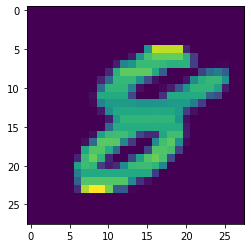

In [33]:
callbacksbb = EarlyStopping(patience = 2)
model3 = Sequential()
model3.add(LSTM(64,input_shape=(x_train.shape[1:]),  return_sequences=True,  activation ='relu') )
model3.add(LSTM(64))
model3.add(Dropout(0.1))
model3.add(Dense(32, activation='softmax'))
model3.add(Dropout(0.1))
model3.add(Dense(10, activation='softmax'))
       
model3.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model3.fit(x_train, y_train, validation_data=(x_val, y_val), verbose = 1, batch_size=128, epochs=10, callbacks=[callbacksbb])
results = model3.evaluate(x_test, y_test)
print("test loss, test acc:", results)

model3.summary()
loss, accuracy = model3.evaluate(x_test, y_test)
print("Loss : " , loss)
print("Accuracy : " , accuracy)

y_pred = model3.predict(x_test, batch_size=64, verbose=1)
y_pred_bool = numpy.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

prediction = model3.predict([x_test])
print('Prediction: ', numpy.argmax(prediction[10]))
plt.imshow(x_test[10])
plt.show()


In [35]:
rnn3Model_json = model3.to_json()
with open("rnn3Model.json", "w") as json_file:
    json_file.write(rnn3Model_json)
model3.save_weights("rnn3Model.h5")

rnn3Modeljsonfile = open('rnn3Model.json', 'r')
loaded_rnn3Model_json = rnn3Modeljsonfile.read()
rnn3Modeljsonfile.close()
rnn3ModelNew = model_from_json(loaded_rnn3Model_json)
rnn3ModelNew.load_weights("rnn3Model.h5")

rnn3ModelNew.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
loss, accuracy = rnn3ModelNew.evaluate(x_test, y_test)

438/438 [==============================] - 3s 5ms/step - loss: 0.7707 - accuracy: 0.5937


In [37]:

def load_image(filename):
    img = load_img(filename, grayscale = True, target_size=(28,28))
    img = img_to_array(img)
    img = img.reshape(1, 28, 28, 1)

    img = img.astype('float32')
    img = img/255.0
    return img
file = input("What is the file name")
img = load_image(file)
predict_value = rnn3ModelNew.predict(img)
digit = numpy.argmax(predict_value)
print(digit)
loss1 = str(loss)
accuracy1 = str(accuracy)
digit1 = str(digit)
with open('resultsRNN3.txt', 'w') as f:
    f.write("This is the loss \n")
    f.writelines(loss1)
    f.write("\n")
    f.write("This is the accuracy \n")
    f.writelines(accuracy1)
    f.write("\n")
    f.write("Based on the file inputted, this RNN Model predicts that the value is :")
    f.write("\n")
    f.writelines(digit1)
    f.close()

What is the file namesample_image7.png
1/1 [==============================] - 0s 22ms/step
3


# CNN Implementation

Reshaping the Data

In [27]:
x_train1 = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_val1 = x_val.reshape(x_val.shape[0], 28, 28 ,1)
x_test1 = x_test.reshape(x_test.shape[0], 28, 28, 1)



In [28]:
# Model
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(32,kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32,kernel_size=5,strides=2,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3, 3), strides=2,padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3, 3), strides=2,padding='same', activation='relu'))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dense(10,activation=tf.nn.softmax))
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train1,y=y_train, validation_data=(x_val1, y_val), epochs=4)

Epoch 1/4
1313/1313 [==============================] - 69s 51ms/step - loss: 0.2284 - accuracy: 0.9318 - val_loss: 0.0677 - val_accuracy: 0.9786
Epoch 2/4
1313/1313 [==============================] - 67s 51ms/step - loss: 0.0818 - accuracy: 0.9758 - val_loss: 0.0600 - val_accuracy: 0.9813
Epoch 3/4
1313/1313 [==============================] - 67s 51ms/step - loss: 0.0613 - accuracy: 0.9812 - val_loss: 0.0527 - val_accuracy: 0.9851
Epoch 4/4
1313/1313 [==============================] - 67s 51ms/step - loss: 0.0504 - accuracy: 0.9845 - val_loss: 0.0555 - val_accuracy: 0.9827


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 28)       112       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        8096      
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 6, 6, 32)        

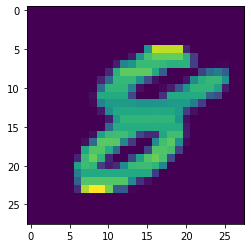

In [29]:
model.summary()
loss, accuracy = model.evaluate(x_test1, y_test)
print("Loss : " , loss)
print("Accuracy : " , accuracy)

y_pred = model.predict(x_test1, batch_size=64, verbose=1)
y_pred_bool = numpy.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

prediction = model.predict([x_test1])
print('Prediction: ', numpy.argmax(prediction[10]))
plt.imshow(x_test1[10])
plt.show()

In [30]:
cnnModel_json = model.to_json()
with open("cnnModel.json", "w") as json_file:
    json_file.write(cnnModel_json)
model.save_weights("cnnModel.h5")

cnnModeljsonfile = open('cnnModel.json', 'r')
loaded_cnnModel_json = cnnModeljsonfile.read()
cnnModeljsonfile.close()
cnnModelNew = model_from_json(loaded_cnnModel_json)
cnnModelNew.load_weights("cnnModel.h5")

cnnModelNew.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
loss, accuracy = cnnModelNew.evaluate(x_test, y_test)


438/438 [==============================] - 4s 8ms/step - loss: 0.0552 - accuracy: 0.9831


In [32]:
def load_image(filename):
    img = load_img(filename, grayscale = True, target_size=(28,28))
    img = img_to_array(img)
    img = img.reshape(1, 28, 28, 1)

    img = img.astype('float32')
    img = img/255.0
    return img
file = input("What is the file name")
img = load_image(file)
predict_value = cnnModelNew.predict(img)
digit = numpy.argmax(predict_value)
print(digit)
loss1 = str(loss)
accuracy1 = str(accuracy)
digit1 = str(digit)
with open('resultsCNN.txt', 'w') as f:
    f.write("This is the loss \n")
    f.writelines(loss1)
    f.write("\n")
    f.write("This is the accuracy \n")
    f.writelines(accuracy1)
    f.write("\n")
    f.write("Based on the file inputted, the CNN Model predicts that the value is :")
    f.write("\n")
    f.writelines(digit1)
    f.close()

What is the file namesample_image7.png
1/1 [==============================] - 0s 21ms/step
7


# Training Different CNN Architectures

# GRU Implementation

In [17]:
from tensorflow.keras.layers import GRU
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [18]:
gru = Sequential([
    GRU(256, input_shape=(28,28), return_sequences=True, activation='relu'),
    GRU(256, activation='relu'),
    Dense(10, activation='softmax')  
    ])
gru.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
gru.summary()
# Callbacks
gru.fit(x_train, y_train, validation_data=(x_val, y_val), verbose=1, batch_size=64, epochs=4)





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 28, 256)           219648    
                                                                 
 gru_1 (GRU)                 (None, 256)               394752    
                                                                 
 dense (Dense)               (None, 10)                2570      
                                                                 
Total params: 616,970
Trainable params: 616,970
Non-trainable params: 0
_________________________________________________________________
Epoch 1/4
657/657 [==============================] - 62s 91ms/step - loss: 0.5953 - accuracy: 0.7927 - val_loss: 0.1951 - val_accuracy: 0.9387
Epoch 2/4
657/657 [==============================] - 61s 92ms/step - loss: 0.1362 - accuracy: 0.9586 - val_loss: 0.1093 - val_accuracy: 0.9656
Epoch 3/4
657/657 [=========

In [19]:
loss, accuracy = gru.evaluate(x_test, y_test)
print("loss : " , loss)
print("accuracy : " , accuracy)


438/438 [==============================] - 7s 15ms/step - loss: 0.0579 - accuracy: 0.9822
loss :  0.05791027471423149
accuracy :  0.9822142720222473


In [20]:
y_pred = gru.predict(x_test, batch_size=64, verbose=1)
y_pred_bool = numpy.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

219/219 [==============================] - 6s 28ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1406
           1       1.00      0.98      0.99      1572
           2       0.97      0.99      0.98      1330
           3       0.99      0.98      0.98      1436
           4       0.98      0.98      0.98      1389
           5       0.97      0.98      0.98      1211
           6       0.99      0.98      0.99      1410
           7       0.98      0.98      0.98      1477
           8       0.99      0.98      0.98      1351
           9       0.96      0.98      0.97      1418

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000



438/438 [==============================] - 7s 15ms/step
Prediction:  7


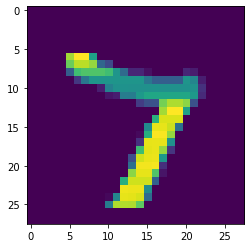

In [21]:
prediction = gru.predict([x_test])
print('Prediction: ', numpy.argmax(prediction[15]))
plt.imshow(x_test[15])
plt.show()

In [22]:
gruModel_json = gru.to_json()
with open("gruModel.json", "w") as json_file:
    json_file.write(gruModel_json)
gru.save_weights("gruModel.h5")

gruModeljsonfile = open('gruModel.json', 'r')
loaded_gruModel_json = gruModeljsonfile.read()
gruModeljsonfile.close()
gruModelNew = model_from_json(loaded_gruModel_json)
gruModelNew.load_weights("gruModel.h5")

gruModelNew.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
loss, accuracy = gruModelNew.evaluate(x_test, y_test)



438/438 [==============================] - 7s 15ms/step - loss: 0.0579 - accuracy: 0.9822


In [26]:
def load_image(filename):
    img = load_img(filename, grayscale = True, target_size=(28,28))
    img = img_to_array(img)
    img = img.reshape(1, 28, 28, 1)

    img = img.astype('float32')
    img = img/255.0
    return img
file = input("What is the file name")
img = load_image(file)
predict_value = gruModelNew.predict(img)
digit = numpy.argmax(predict_value)
print(digit)
loss1 = str(loss)
accuracy1 = str(accuracy)
digit1 = str(digit)
with open('resultsGRU.txt', 'w') as f:
    f.write("This is the loss \n")
    f.writelines(loss1)
    f.write("\n")
    f.write("This is the accuracy \n")
    f.writelines(accuracy1)
    f.write("\n")
    f.write("Based on the file inputted, the GRU Model predicts that the value is :")
    f.write("\n")
    f.writelines(digit1)
    f.close()

What is the file namesample_image7.png
1/1 [==============================] - 0s 23ms/step
7


In [15]:
!pip install session-info
import session_info
session_info.show()

     |████████████████████████████████| 63 kB 1.5 MB/s eta 0:00:01
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8045 sha256=c88c2f55d79f108d83e7f391e692f9758224f6d41fde4e316b29e493c1d3dbaf
  Stored in directory: /Users/aadithyanair/Library/Caches/pip/wheels/5c/1b/4d/111d73980c5c6a8e5e5905a19eccc34296cb359cac54c6c5b9
Successfully built session-info
